In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

pd.set_option('display.max_columns', None)

print(df.columns.to_list())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Is it relevant the number of computer skills or just the sepcific skill? Look for correlation between years of code, computer skills and employed

For previous salary take into account country to mitigate bias. Should we take into account these two factors?. Do clustering for comparison

Imbalance Class Problem: Too few non developers, concentrate just developers or integrate other datasets to improve representation of non devs. 

To separate Age by <35/ >35 can be useful for future analysis





In [4]:

#Numerical columns
num = df.select_dtypes(exclude='O')
num.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#categorical columns
cat = df.select_dtypes(include='O')
cat.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [29]:

print(df.shape)
print(df.apply(lambda col: col.unique())) 

table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(table)


(1470, 31)
Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...
JobInvolvement                                                   [3, 2, 4, 1]
JobLevel                                             

,Unique,Null,NullPercent,Type
Age,43,0,0.0,int64
Attrition,2,0,0.0,object
BusinessTravel,3,0,0.0,object
DailyRate,886,0,0.0,int64
Department,3,0,0.0,object
DistanceFromHome,29,0,0.0,int64
Education,5,0,0.0,int64
EducationField,6,0,0.0,object
EnvironmentSatisfaction,4,0,0.0,int64
Gender,2,0,0.0,object


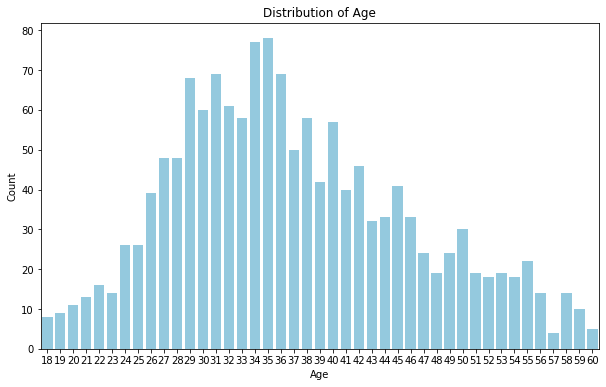

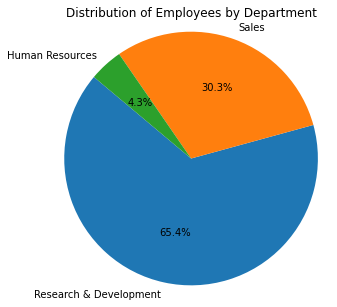

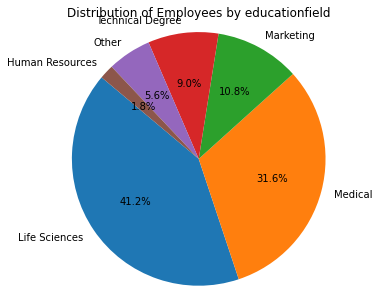

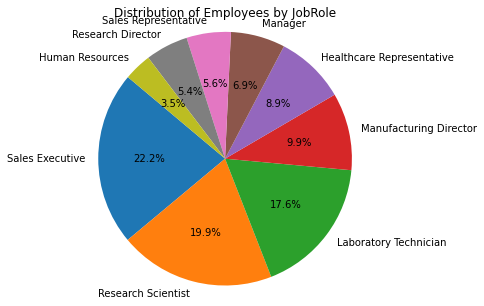

In [10]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

#Employee by deprtments
department_counts = df['Department'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Department')
plt.axis('equal')
plt.show()

#Employee by Educationfield
educationfield_counts = df['EducationField'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(educationfield_counts, labels=educationfield_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by educationfield')
plt.axis('equal')
plt.show()



jobRole_counts = df['JobRole'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(jobRole_counts, labels=jobRole_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by JobRole')
plt.axis('equal')
plt.show()


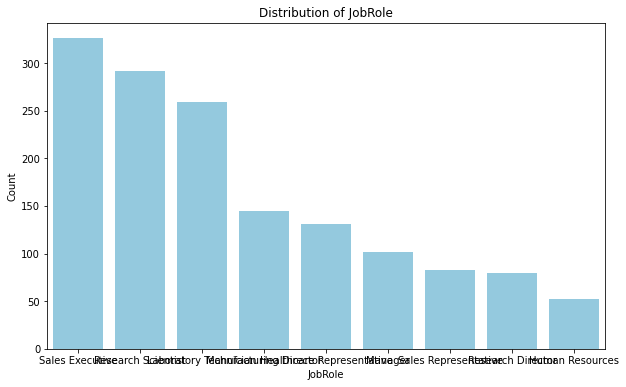

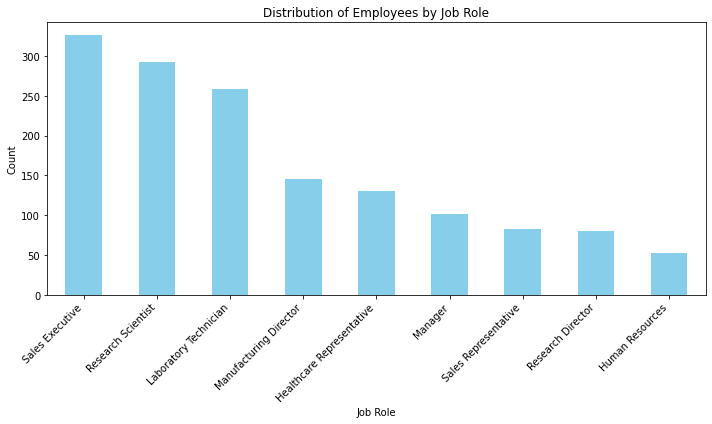

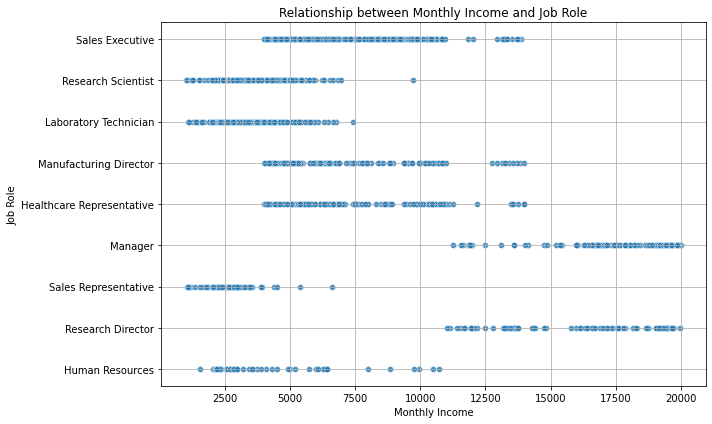

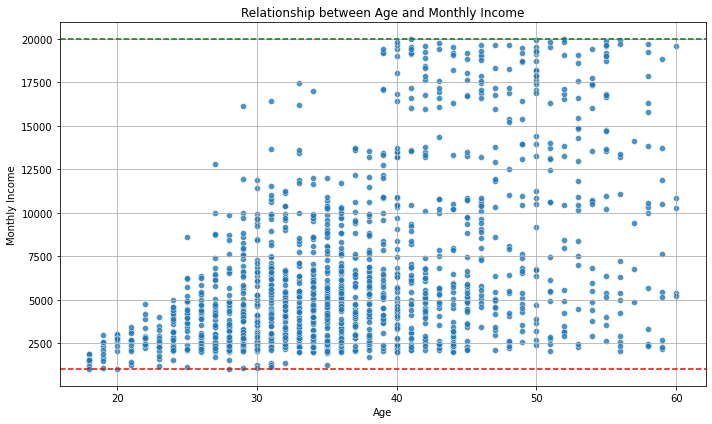

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobRole', color='skyblue')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.title('Distribution of JobRole')
plt.show()

jobrole_counts = df['JobRole'].value_counts()

plt.figure(figsize=(10, 6))
jobrole_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyIncome', y='JobRole', alpha=0.8)  # กำหนดความโปร่งแสงของจุดเป็น 0.8
plt.title('Relationship between Monthly Income and Job Role')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.grid(True)  # เปิดการแสดงเส้นกริด
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', alpha=0.8) 

min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
plt.axhline(y=min_income, color='r', linestyle='--', label='Min Monthly Income') 
plt.axhline(y=max_income, color='g', linestyle='--', label='Max Monthly Income')  

plt.title('Relationship between Age and Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.tight_layout()
plt.show()

## Transformation

Employee_count is always 1 so we can remove it. Employee_Count is like an ID so we can remove it. Over 18 columns is alwas yes so we can remove it. Standard hours is alwas 80 so we can remove it (Is this value really accurate or is it erroneous and legitimate entries?)

In [12]:

df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)


<ipython-input-13-920128de4d43>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1f')


<Axes: >

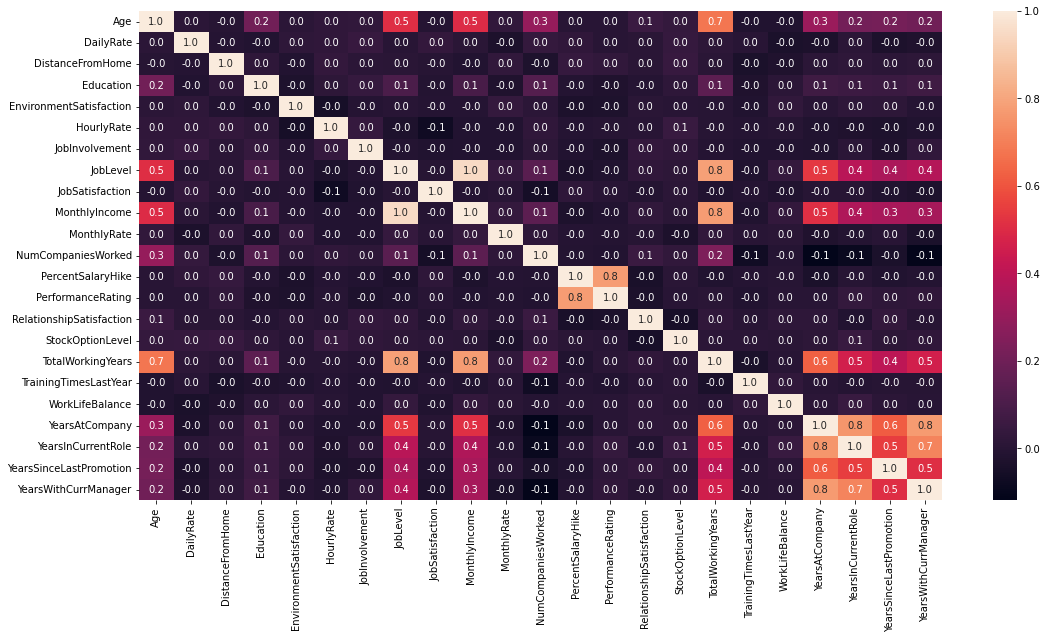

In [13]:
#Correlation between columns

plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

<Axes: >

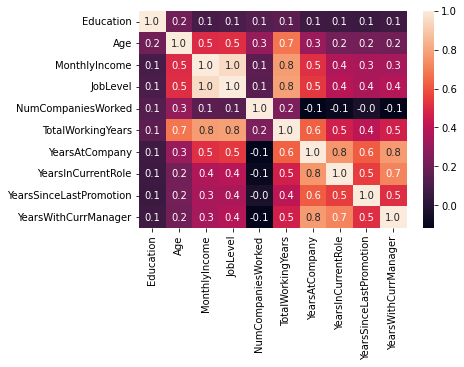

In [24]:
# Map only the columns with strong correlation
columns = ['Education','Age','MonthlyIncome','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
sns.heatmap(df[columns].corr(), annot=True, fmt='.1f')

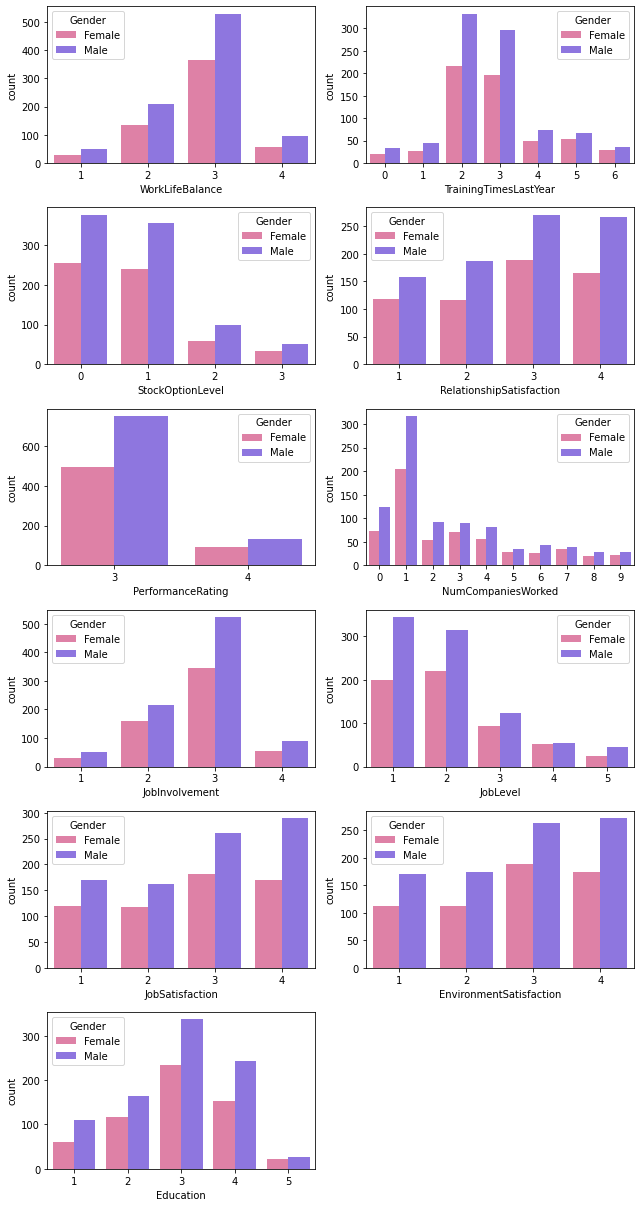

In [15]:
columns = ['WorkLifeBalance','TrainingTimesLastYear','StockOptionLevel',
    'RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']

plt.figure(figsize=(9,36))
for i,col in enumerate(columns):
    axes = plt.subplot(13,2, i + 1)
    sns.countplot(x=df[col], hue=df['Gender'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

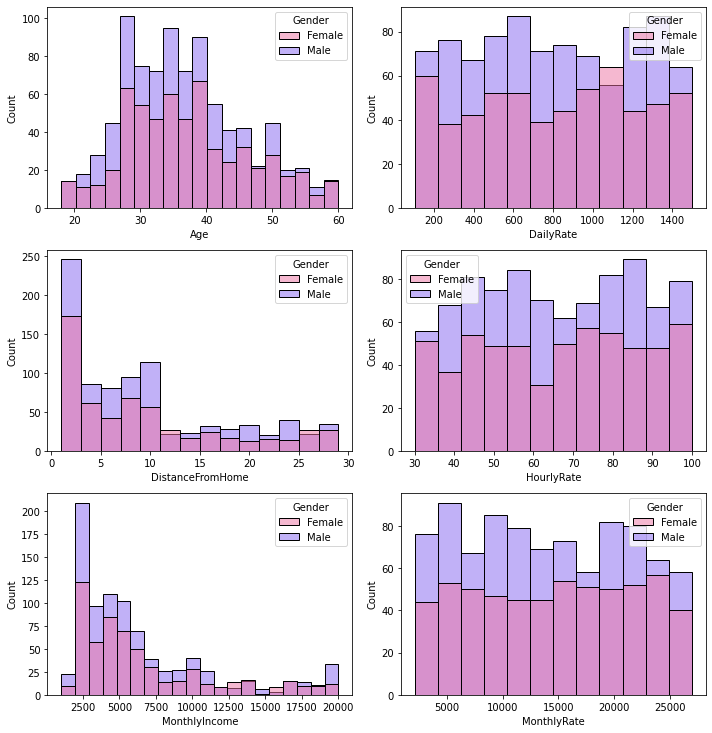

In [16]:
hist = ['Age', 'DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
       'MonthlyRate']

plt.figure(figsize=(10,20))
for i,col in enumerate(hist):
    axes = plt.subplot(6,2, i + 1)
    sns.histplot(x=df[col], hue=df['Gender'], palette=['#ED72A3','#8565F0'])
plt.tight_layout()
plt.show()

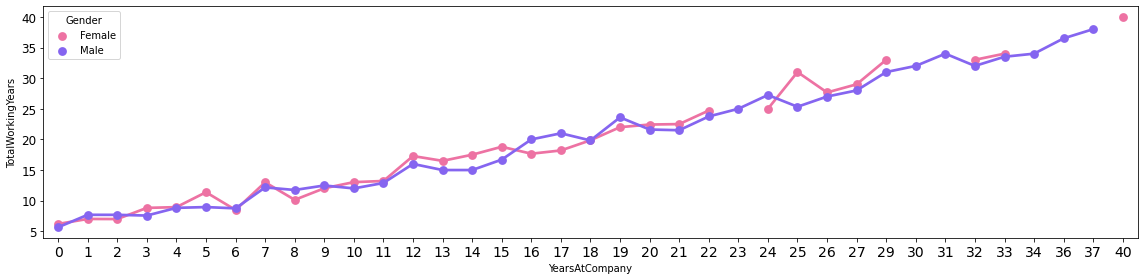

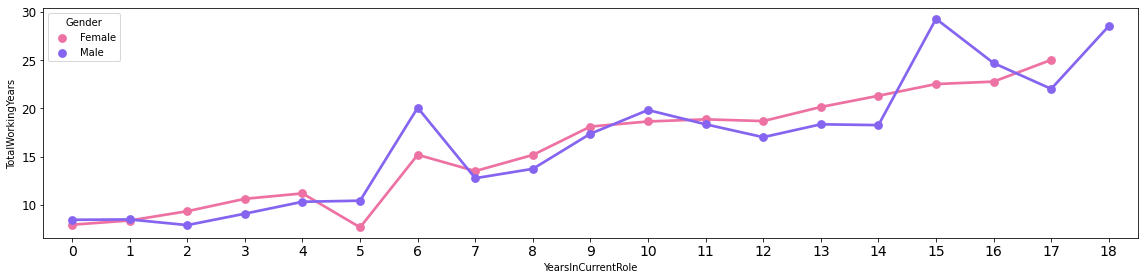

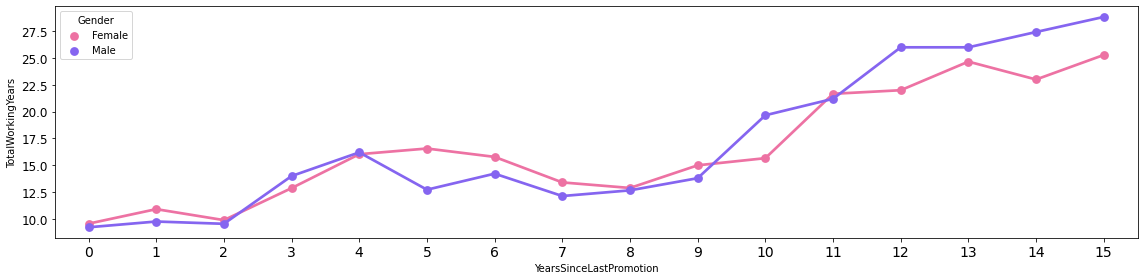

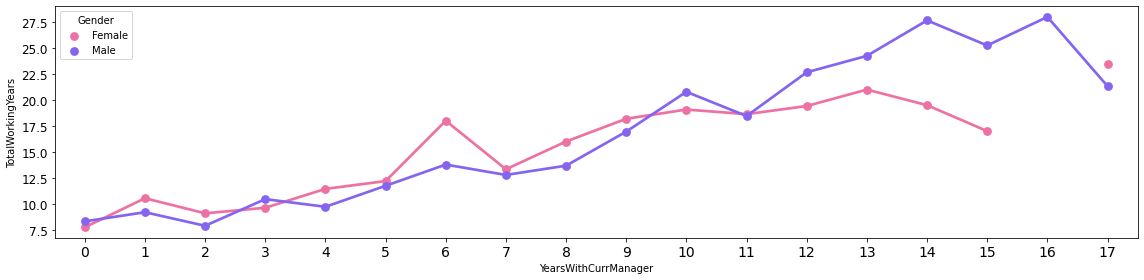

In [17]:
# Correlation: Total Years of Work
columns = ['YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

# define a variable 'color' with seaborn color palette 'dark'
color = 'dark'

for i in columns:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=df[i], y=df['TotalWorkingYears'], hue=df['Gender'], palette=['#ED72A3','#8565F0'], errorbar=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

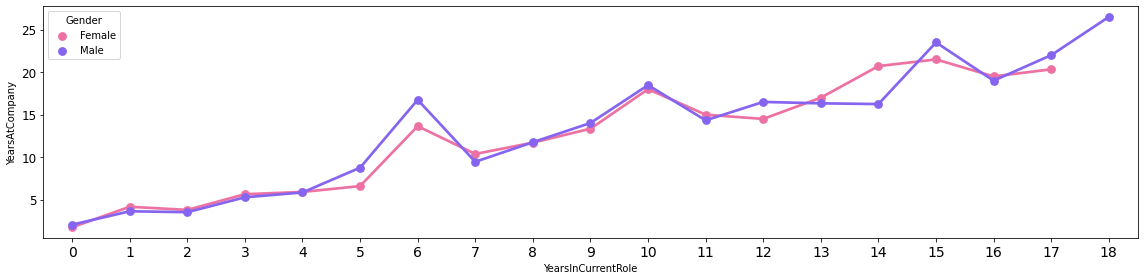

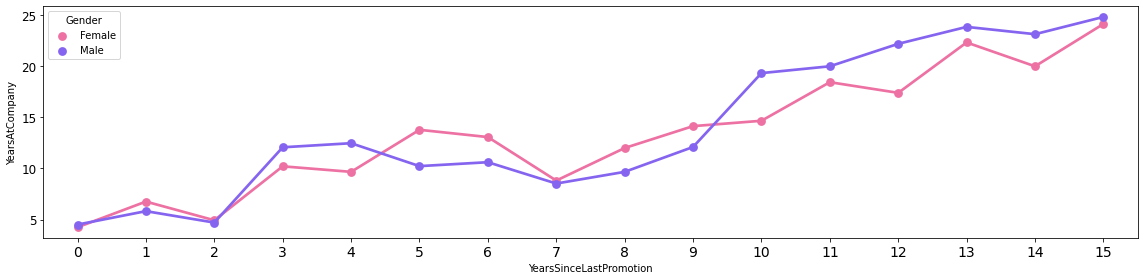

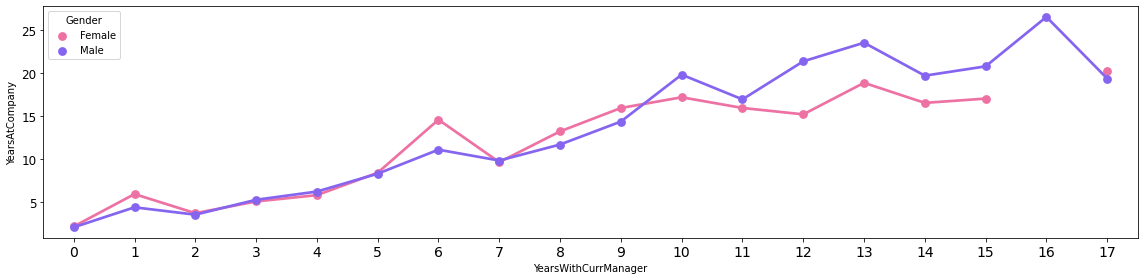

In [18]:
# Correlation: Years at the Company
columns = ['YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for i in columns:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=df[i], y=df['YearsAtCompany'], hue=df['Gender'], palette=['#ED72A3','#8565F0'], errorbar=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

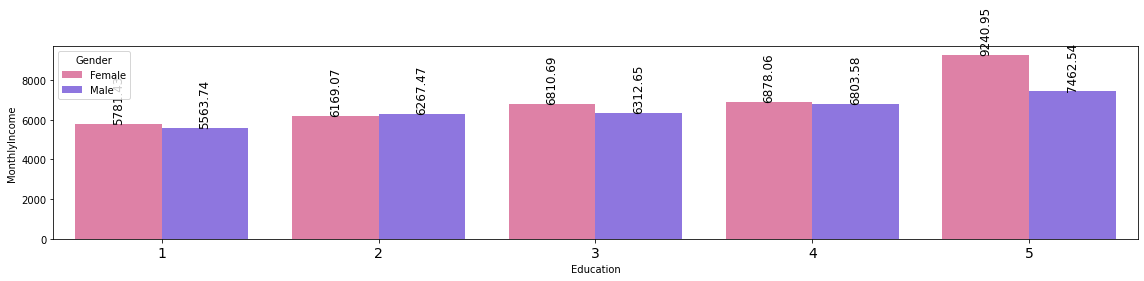

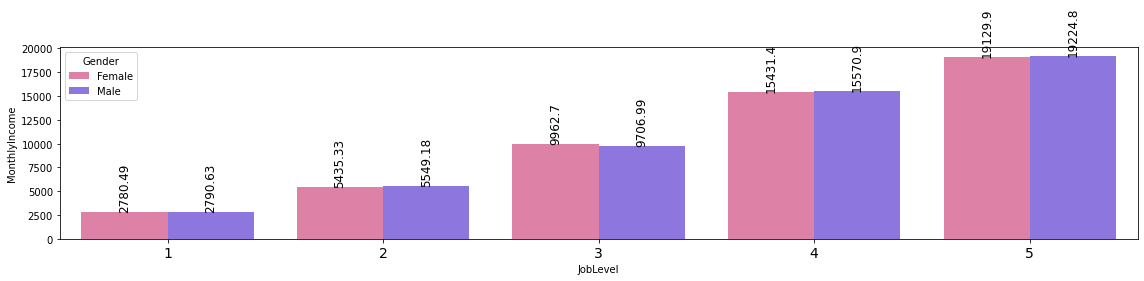

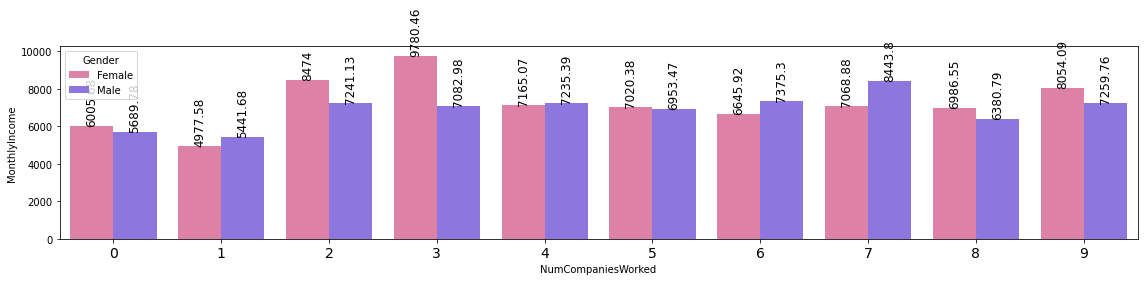

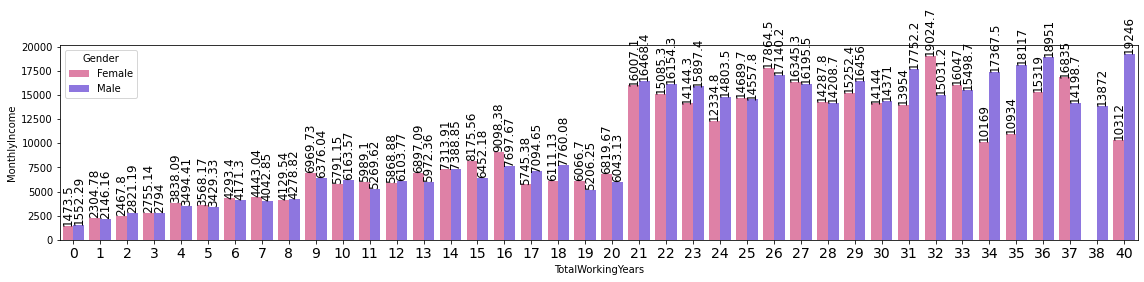

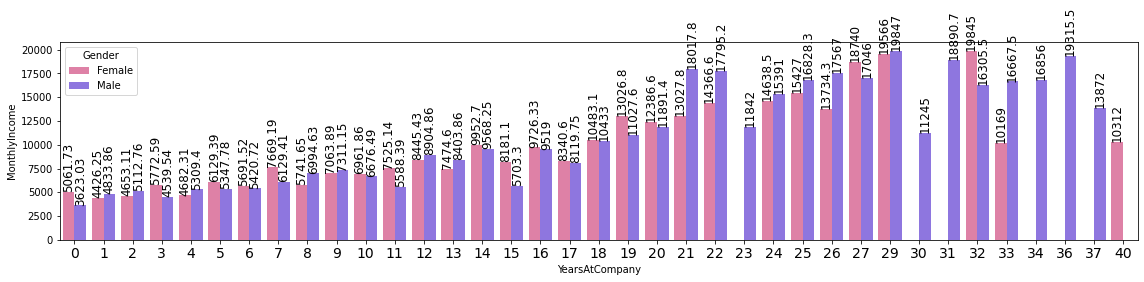

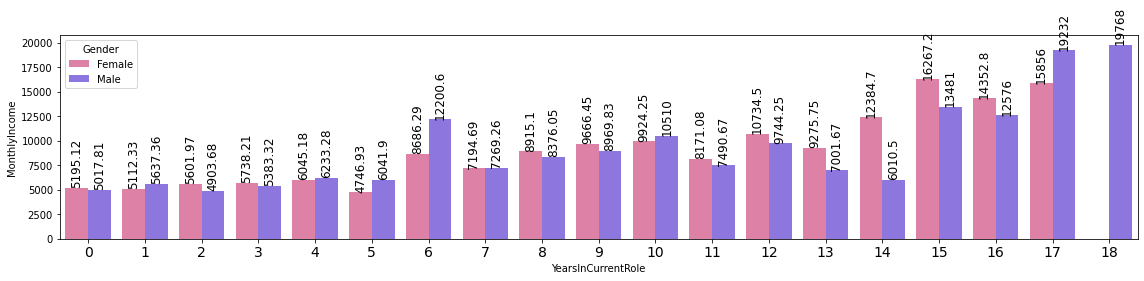

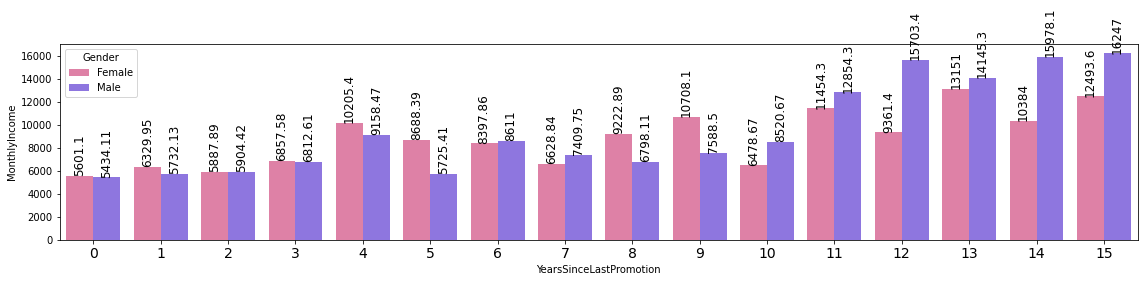

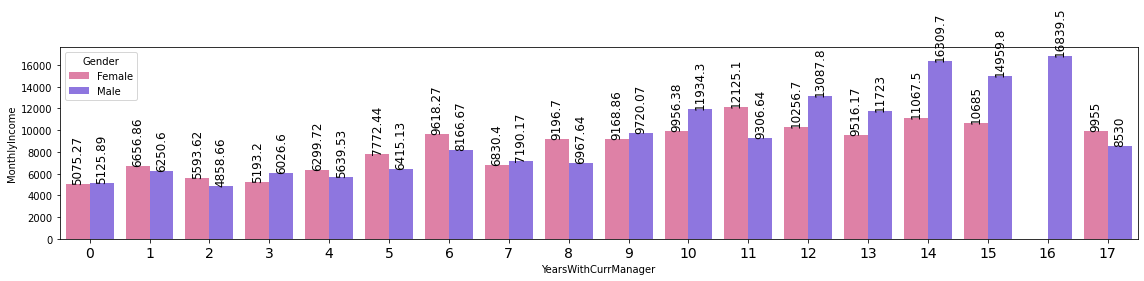

In [19]:
#Monthly income 

columns = ['Education','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for i in columns:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['Gender'], palette=['#ED72A3','#8565F0'], errorbar=None)
    plt.xticks(fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()

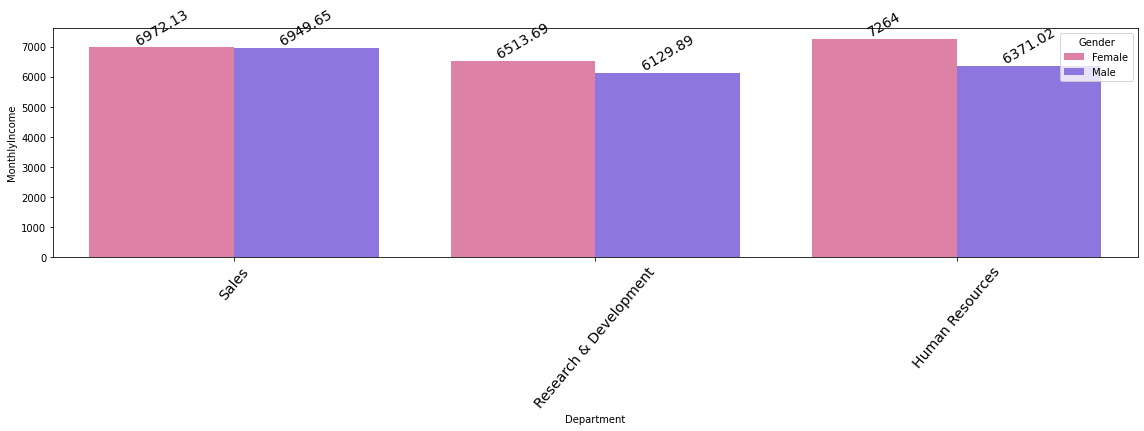

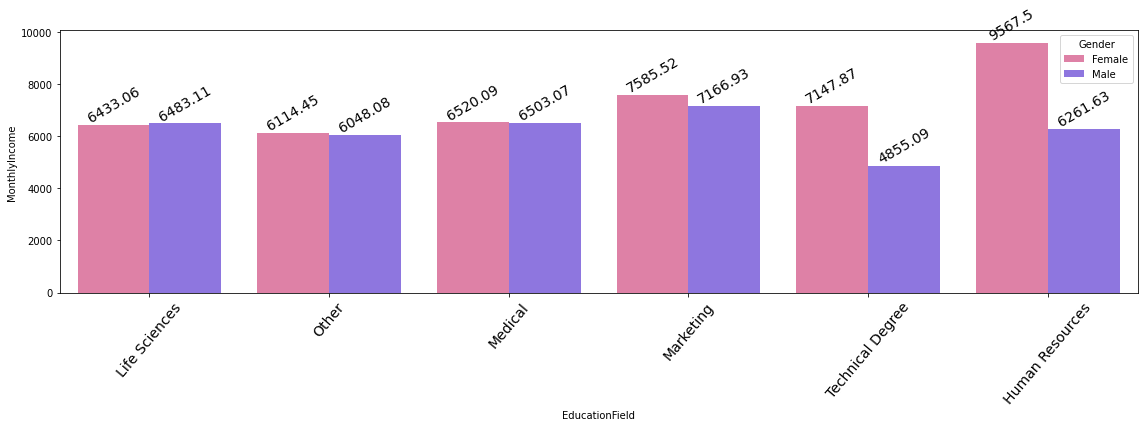

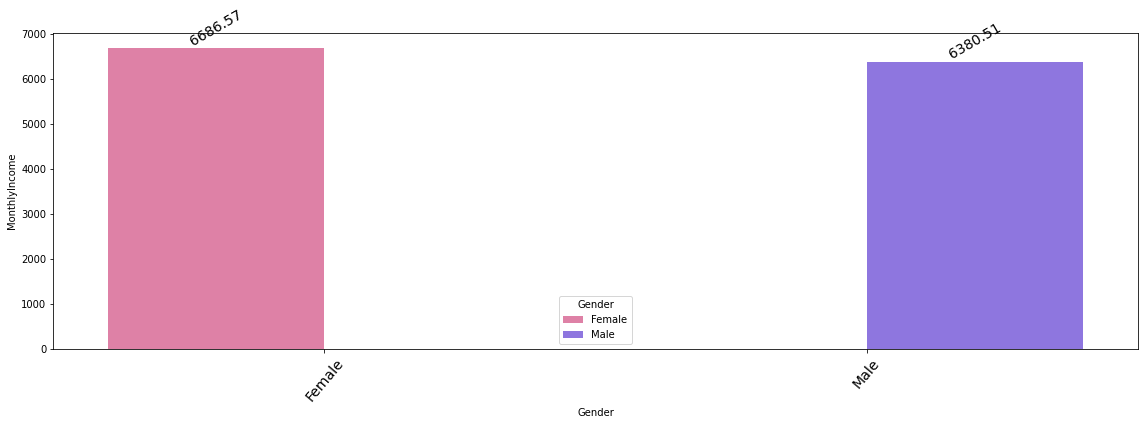

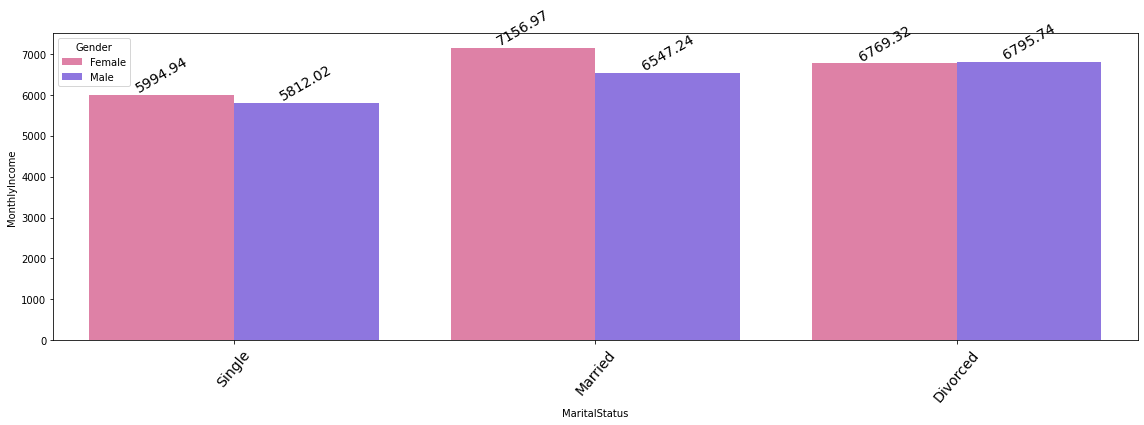

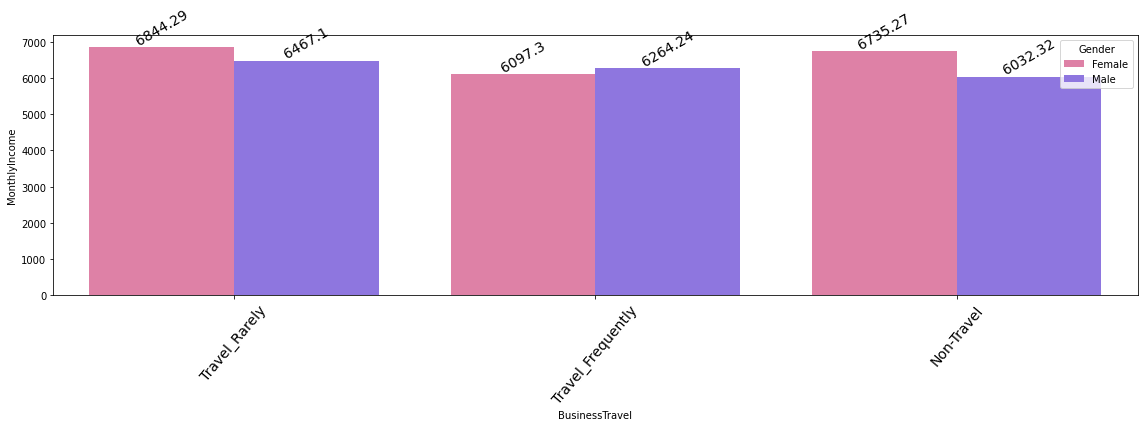

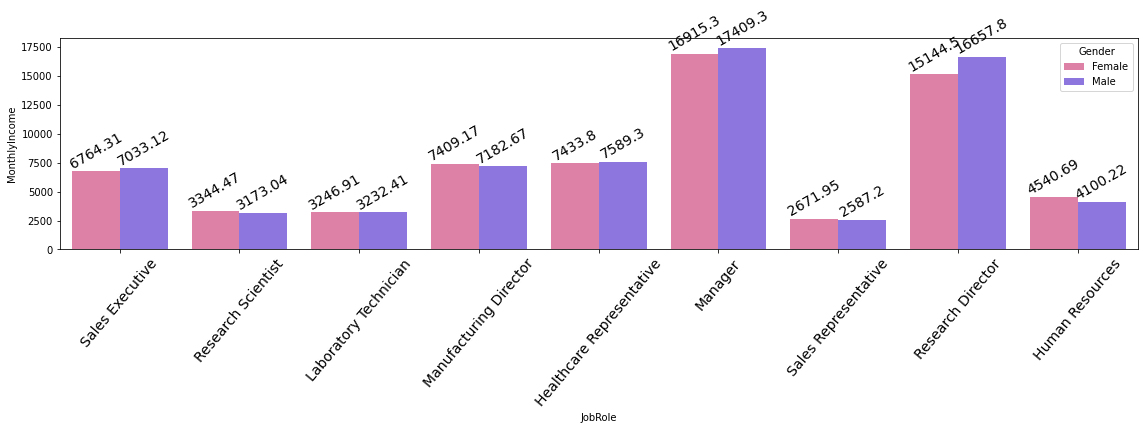

In [20]:
columns = ['Department','EducationField','Gender','MaritalStatus','BusinessTravel','JobRole']

for i in columns:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['Gender'], palette=['#ED72A3','#8565F0'], errorbar=None)
    plt.xticks(rotation=50,fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30, fontsize=14)
    plt.tight_layout()
    plt.show()

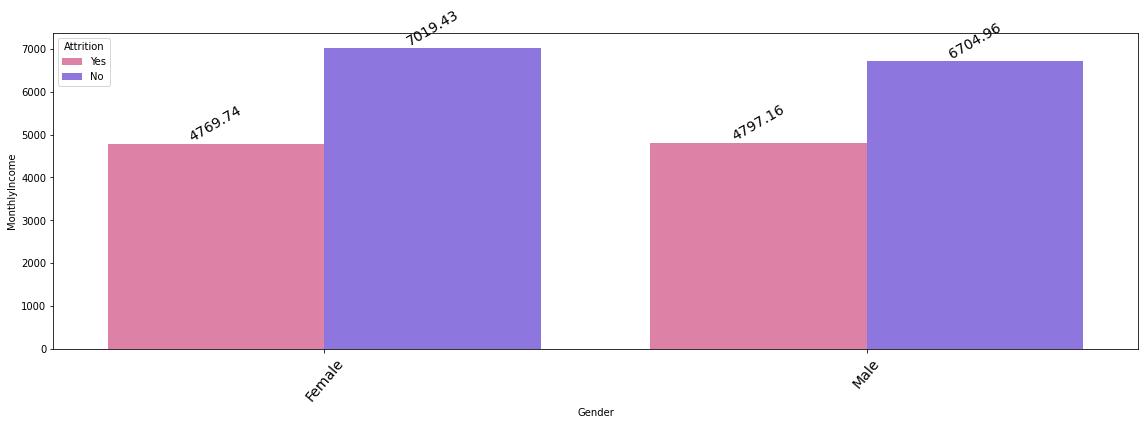

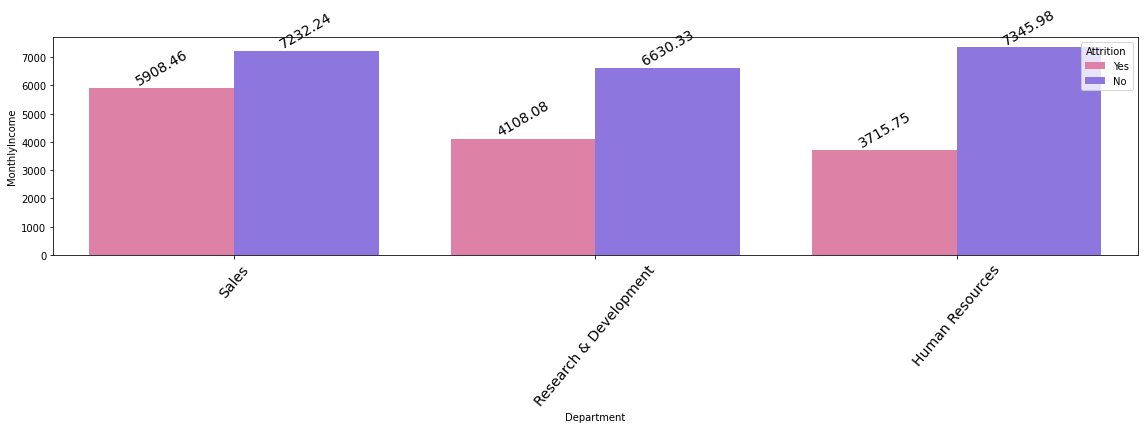

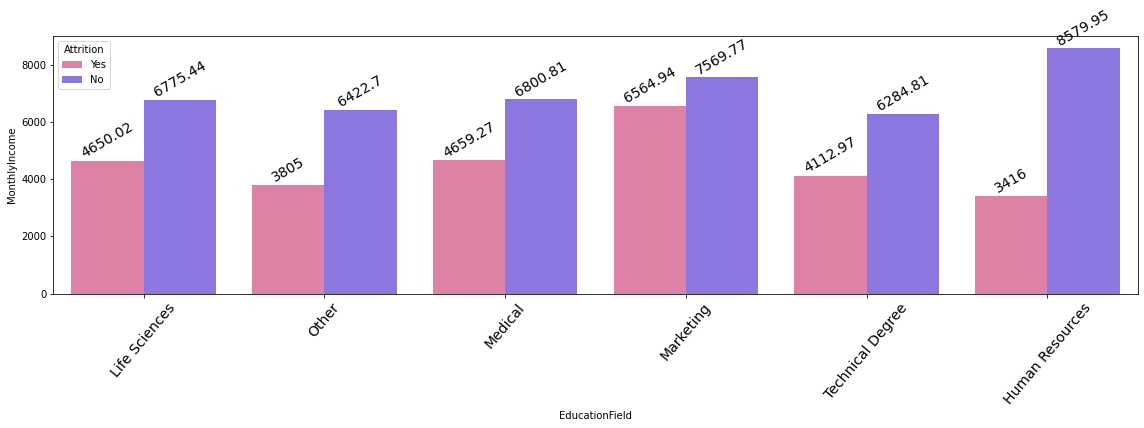

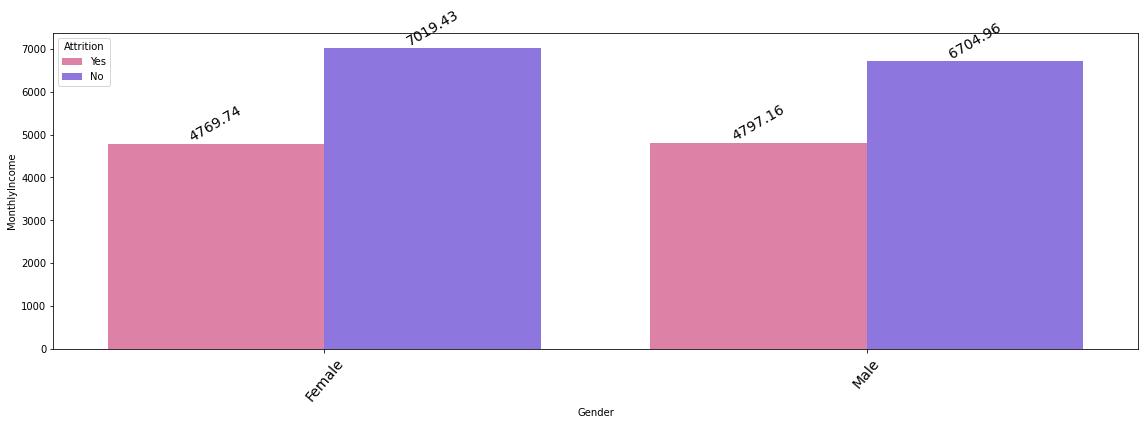

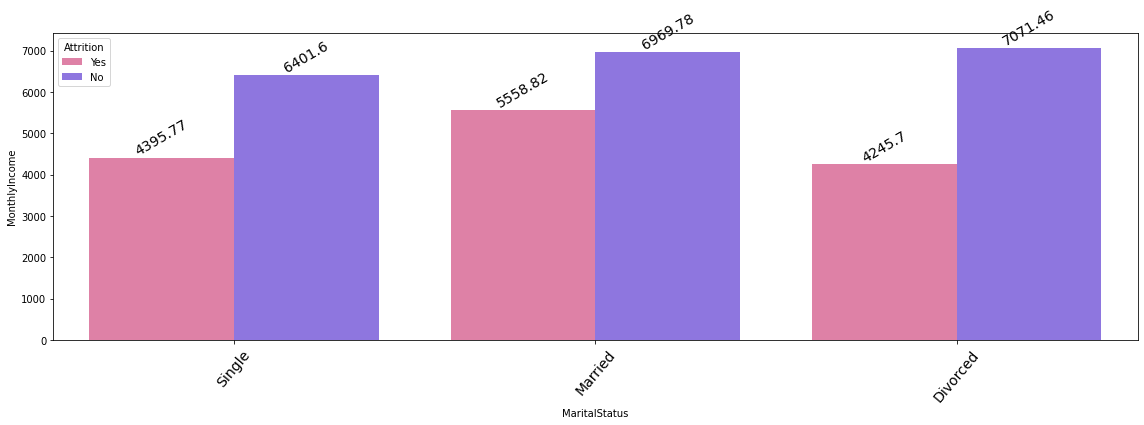

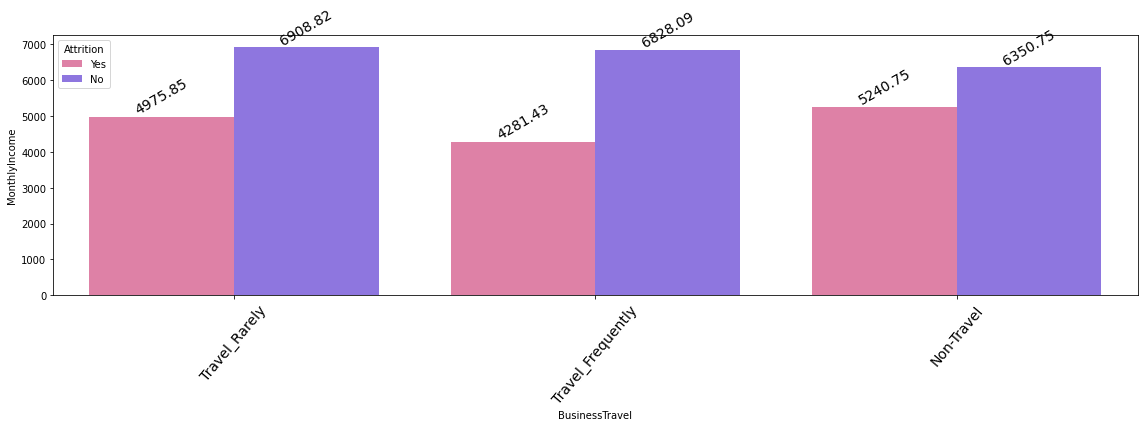

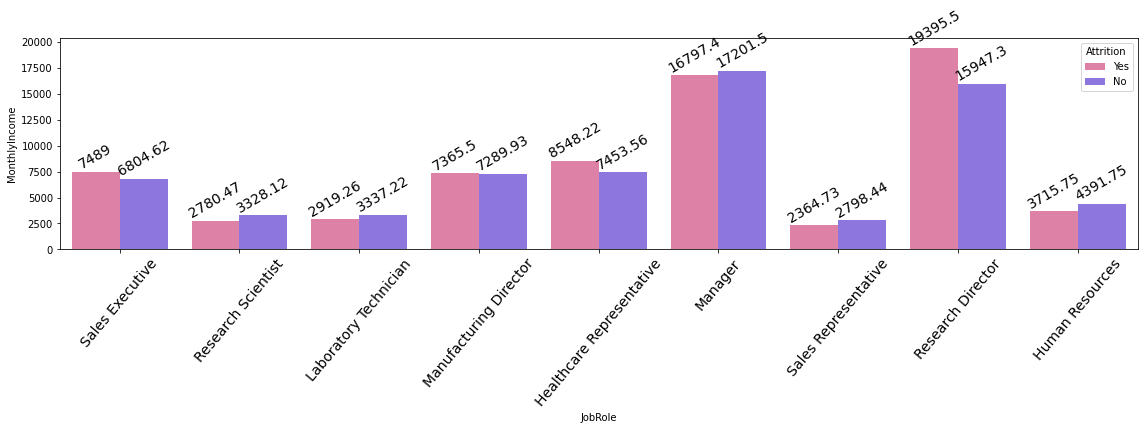

In [21]:
#Monthly income by attrition

columns = ['Gender','Department','EducationField','Gender','MaritalStatus','BusinessTravel','JobRole']

for i in columns:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['Attrition'], palette=['#ED72A3','#8565F0'], errorbar=None)
    plt.xticks(rotation=50,fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30,fontsize=14)
    plt.tight_layout()
    plt.show()

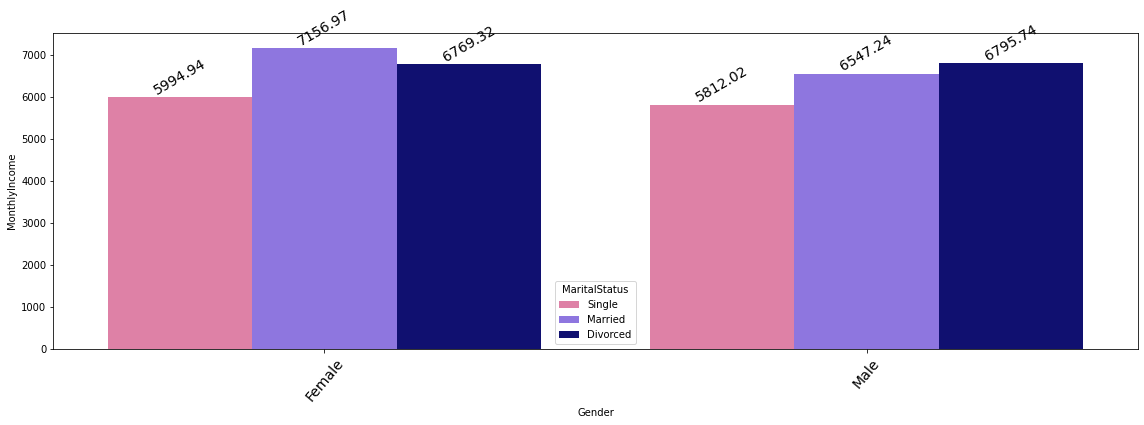

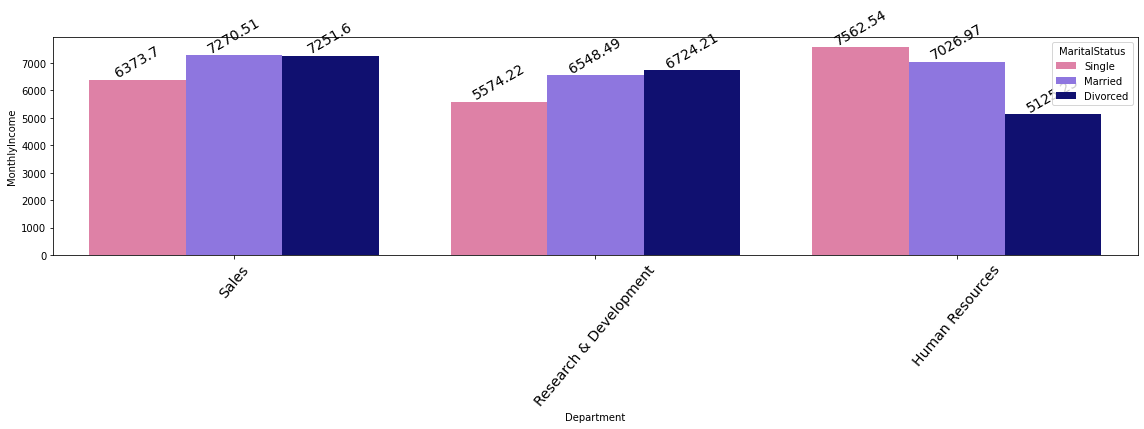

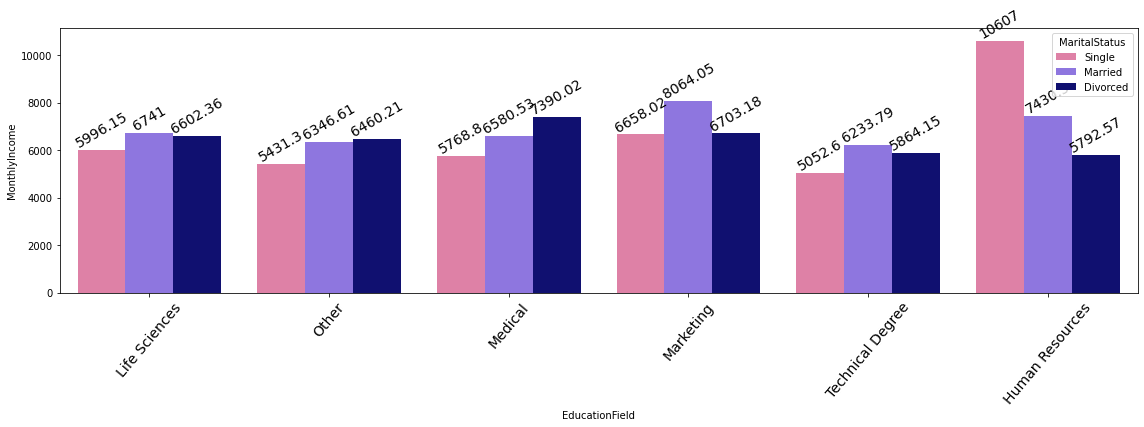

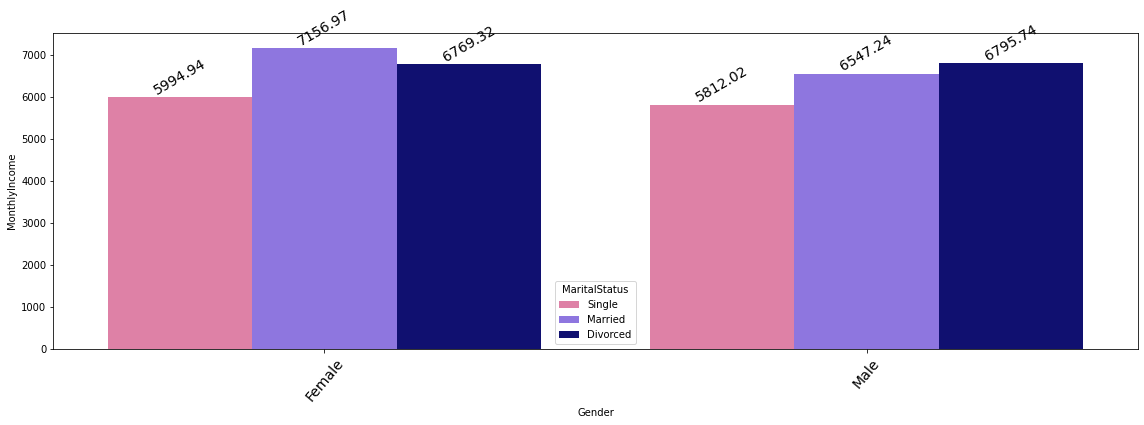

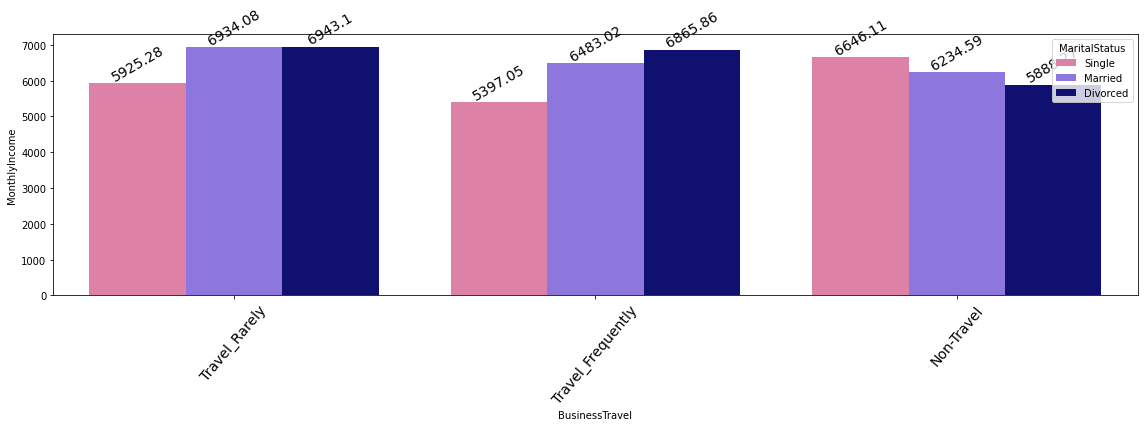

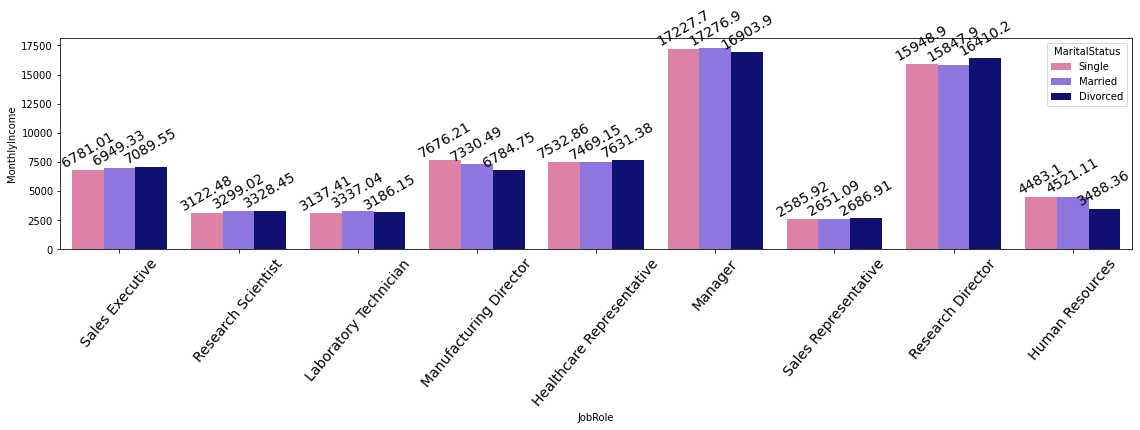

In [26]:

#Income by maritial status
columns = ['Gender','Department','EducationField','Gender','BusinessTravel','JobRole']

for i in columns:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=df[i], y=df['MonthlyIncome'], hue=df['MaritalStatus'], palette=['#ED72A3','#8565F0', '#000080'], errorbar=None)
    plt.xticks(rotation=50,fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30,fontsize=14)
    plt.tight_layout()
    plt.show()


KeyError: KeyError: 'Over18'

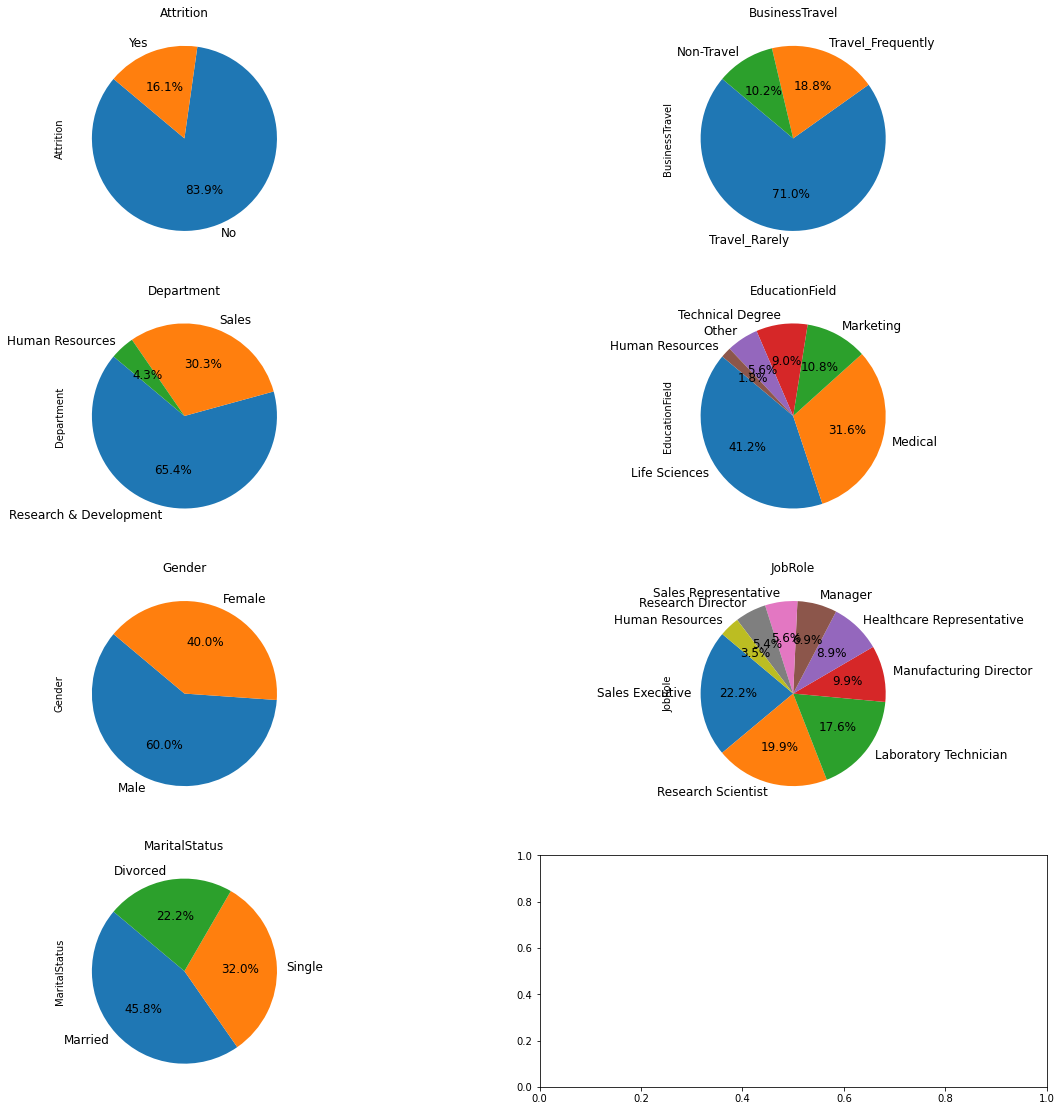

In [27]:
plt.figure(figsize=(20,40))
for i,col in enumerate(cat):
    axes = plt.subplot(8,2, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%',textprops={'size':12,'color':'black'},startangle=140)
    plt.title(col)
plt.tight_layout()
plt.show()

Business Travel column could be useful for a different analysis approach to determine causees of attrition (Work-Life Balance, etc..) but for our project is rather irrelevant